In [91]:
import os
import glob
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [92]:
from utils.datatools import * # getPatientsTable()

In [93]:
PHASEPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE/"
STDPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE_STD/"
CONTROL_PATH = os.path.join(STDPATH, "Controls")
PD_PATH = os.path.join(STDPATH, "PD")
STDVIZPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE_STD_viz/"
VIZ_CONTROL_PATH = os.path.join(STDVIZPATH, "Controls")
VIZ_PD_PATH = os.path.join(STDVIZPATH, "PD")

In [94]:
# 사용 가능한 컬럼 
# 1. 면적
# 2. 걷는 회수
# 3. z 최대-최소
# 4. 각 페이즈별 프레임 수의 차이

df = pd.DataFrame(columns=["Patient", "Area-z", "Area-z-diff", "Steps", "Z-diff", "Phase1-diff", "Category"])

In [95]:
patients = getPatientsTable()
CONTROL = patients[patients["Category"] == "Controls"]
PD = patients[patients["Category"] == "PD"]

In [98]:
for pName, pCate in patients[["Patient", "Category"]].values:
    print(pName, pCate)
#     print(glob.glob(os.path.join(CONTROL_PATH, f"*{pName}*")))
#     print(glob.glob(os.path.join(VIZ_CONTROL_PATH, f"*{pName}*AREA.npy")))
    
    # 1. area
    
    TARGET_VIZ_PATH = VIZ_CONTROL_PATH
    if pCate == "PD": TARGET_VIZ_PATH = VIZ_PD_PATH
    
    area_z = []
    area_z_diff = []
    for file in glob.glob(os.path.join(TARGET_VIZ_PATH, f"*{pName}*AREA.npy")):
        # [ LH, RH, LH_DIFF, RH_DIFF ]
        LH, RH, LH_DIFF, RH_DIFF = np.load(file)
        area_z.append(LH - RH)
        area_z_diff.append(LH_DIFF - RH_DIFF)
        
    # 2. steps
    
    TARGET_PATH = CONTROL_PATH
    if pCate == "PD": TARGET_PATH = PD_PATH
    
    cnt_peeks = []
    
    z_diff = []
    for file in glob.glob(os.path.join(TARGET_PATH, f"*{pName}*")):
        cnt = 0

        data = pd.read_csv(file)
#         WINDOW = 5
        
#         TARGET_P = 3
#         start = [np.where(data["PHASE"] == TARGET_P)[0][0]] + [ x for idx, x in enumerate(np.where(data["PHASE"] == TARGET_P)[0][1:]) if x -np.where(data["PHASE"] == TARGET_P)[0][idx] > WINDOW ]
#         n_left = len([ idx for idx in start if round(data["LHEE_Z_DIFF"][idx], 0) == 0])
        
#         TARGET_P = 2
#         start = [np.where(data["PHASE"] == TARGET_P)[0][0]] + [ x for idx, x in enumerate(np.where(data["PHASE"] == TARGET_P)[0][1:]) if x -np.where(data["PHASE"] == TARGET_P)[0][idx] > WINDOW ]
#         n_right = len([ idx for idx in start if round(data["LHEE_Z_DIFF"][idx], 0) == 0])
        
#         cnt += (n_left + n_right)
#         print(cnt, n_left, n_right)
        
        # 3. z-diff 
        
        print(np.max(data["LHEE_Z"].values) - np.max(data["RHEE_Z"].values))
        z_diff.append(np.max(data["LHEE_Z"].values) - np.max(data["RHEE_Z"].values))
        
        
    info = {"Patient": pName, 
            "Area-z": np.mean(np.array(area_z)), 
            "Area-z-diff": np.mean(np.array(area_z_diff)), 
#             "Steps",
            "Z-diff": np.mean(np.array(z_diff)), 
#             "Phase1-diff",
            "Category": pCate}
    
    df = df.append(info, ignore_index=True)

BHY Controls
0.5924689999999941
2.5363159999999993
1.9841610000000003
CHH Controls
-7.40769899999998
4.636291999999997
-8.151505000000014
HSH Controls
-6.0099189999999965
-4.510162000000008
-6.474091000000016
JHY Controls
4.613738999999981
-5.577880999999991
3.250809000000004
JJG Controls
2.828444999999988
-3.1262820000000033
6.041657000000015
JKJ Controls
-5.6220699999999795
-9.104645000000005
3.2434690000000046
KES Controls
8.326569000000006
0.3723290000000077
2.612823999999989
KMS Controls
-8.364547999999985
-10.867843000000022
-16.13446000000002
KangYK Controls
-14.67486599999998
-18.032578
-3.7165839999999832
KimDS Controls
9.061722000000003
-16.19053600000001
-2.1785890000000165
KimYC Controls
-14.54409800000002
-13.822326000000004
-29.76882900000001
KimYJ Controls
2.0808409999999924
-4.322738999999984
-10.059692000000013
LeeNS Controls
4.201843999999994
-11.797852000000006
-16.58178699999999
NTH Controls
-7.411803999999989
-18.315810999999997
0.9264070000000117
ODS Controls
PSW 

/Users/sujinlee/.virtualenvs/ml/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sujinlee/.virtualenvs/ml/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-10.993622000000016
8.420638999999994
ParkSD Controls
3.6805719999999837
11.379195999999979
13.57107499999998
SHI Controls
-17.421509000000015
-6.490677000000005
-23.05950899999999
SeoBS Controls
-9.006728999999979
-7.268906000000015
-11.423338999999999
SeoJY Controls
0.03285199999999122
-0.35200499999999124
41.08596799999998
WYH Controls
3.2673039999999673
-2.1911619999999914
24.141966999999994
YBW Controls
8.730576000000013
13.13336099999998
8.744902999999994
AMJ PD
-17.65811199999999
3.3244940000000156
-2.83908100000005
BDY PD
-5.874801000000019
7.545287999999999
13.244812999999994
BGH PD
BHJ PD
-11.899428999999998
-1.5077969999999823
-5.946716000000009
BSB PD
-16.903091999999987
-19.647018999999972
-12.991455000000002
BSR PD
-4.237792999999982
-6.151168000000013
-8.645095999999967
BTC PD
0.43629400000000373
-0.704529000000008
-6.210601999999994
BYH PD
-16.868240000000014
-4.804183999999992
-1.621276999999992
CCC PD
-1.8808290000000056
-6.106491000000005
-6.857574999999997
CCD PD
0.

In [100]:
df

,Patient,Area-z,Area-z-diff,Steps,Z-diff,Phase1-diff,Category
0,BHY,102.709148,17.002112,NaN,1.704315,NaN,Controls
1,CHH,304.227452,-1.616829,NaN,-3.640971,NaN,Controls
2,HSH,986.371234,2.317568,NaN,-5.664724,NaN,Controls
3,JHY,-321.453166,-1.757943,NaN,0.762222,NaN,Controls
4,JJG,1381.638530,9.256764,NaN,1.914607,NaN,Controls
...,...,...,...,...,...,...,...
205,YJM,-1365.146321,0.854123,NaN,-18.582514,NaN,PD
206,YKJ,-1122.525300,19.884308,NaN,-14.341517,NaN,PD
207,YKS,-1287.355149,3.760910,NaN,-6.618764,NaN,PD
208,YSC,NaN,NaN,NaN,NaN,NaN,PD


In [8]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
             [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [162]:
targetColumns = df.columns[[1,2,4]].values

In [113]:
pIdx = df.iloc[:,[1,2,4]].dropna().index

In [130]:
X = df.iloc[:,[1,2,4]].dropna().values
y = [ 0 if df["Category"][idx] == "Controls" else 1 for idx in pIdx ]

In [115]:
model = KMeans(n_clusters = 2).fit(X)

In [119]:
y_hat = model.predict(X)

In [170]:
print("Average silhouette_score :", silhouette_score(X, y_hat))

Average silhouette_score : 0.5411082620965689


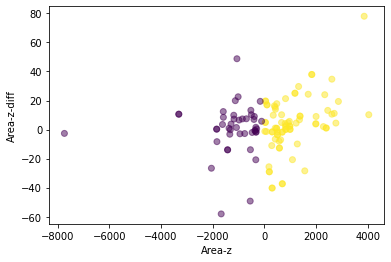

In [164]:
x = X[:, 0]
y = X[:, 1]
plt.scatter(x, y, c=y_hat, alpha=0.5)
plt.xlabel(targetColumns[0])
plt.ylabel(targetColumns[1])
plt.show()

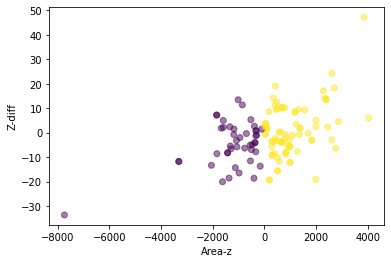

In [165]:
x = X[:, 0]
y = X[:, 2]
plt.scatter(x, y, c=y_hat, alpha=0.5)
plt.xlabel(targetColumns[0])
plt.ylabel(targetColumns[2])
plt.show()

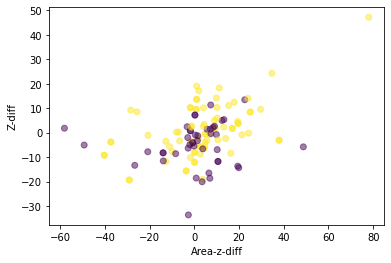

In [166]:
x = X[:, 1]
y = X[:, 2]
plt.scatter(x, y, c=y_hat, alpha=0.5)
plt.xlabel(targetColumns[1])
plt.ylabel(targetColumns[2])
plt.show()